# Experiment 4

In [1]:
from generate_test_matrices import generate_hilbert_matrix, generate_A2, generate_A3
from GN import GN
import numpy as np
import matplotlib.pyplot as plt
import tqdm

For good measure, let us plot the singular values $\sigma$ for the three test matrices.

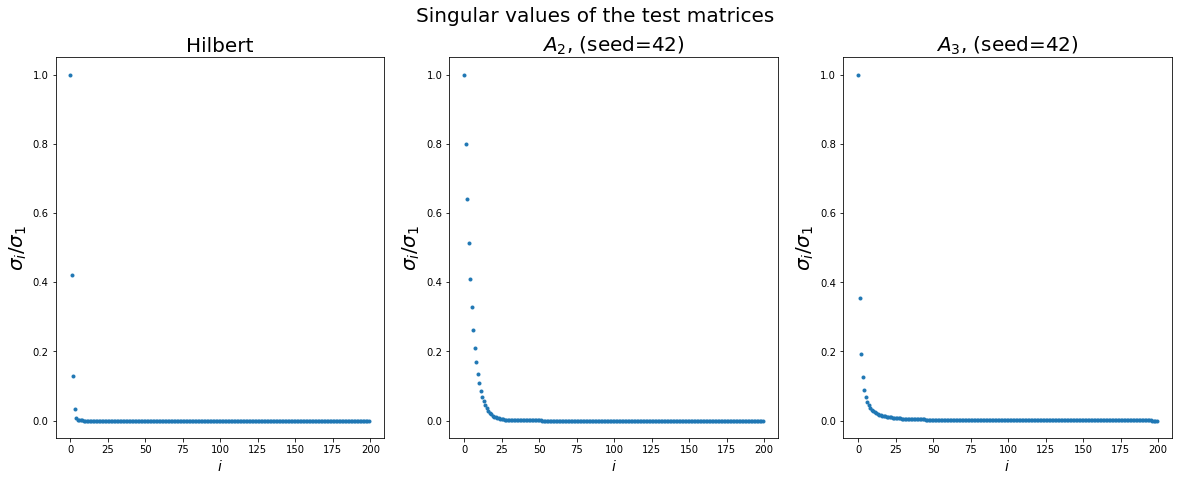

In [2]:
#Let's plot the singular values.
A = generate_hilbert_matrix(200)
_, hilbert_singular_values, _ = np.linalg.svd(A)

A = generate_A2(200, seed=42)
_, A2_singular_values, _ = np.linalg.svd(A)

A = generate_A3(200, seed=42)
_, A3_singular_values, _ = np.linalg.svd(A)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

#Plot the singular values.
ax[0].plot(hilbert_singular_values / hilbert_singular_values[0], '.')
ax[1].plot(A2_singular_values / A2_singular_values[0], '.')
ax[2].plot(A3_singular_values / A3_singular_values[0], '.')

#Set the labels.
ax[0].set_title('Hilbert', fontsize=20)
ax[1].set_title('$A_2$, (seed=42)', fontsize=20)
ax[2].set_title('$A_3$, (seed=42)', fontsize=20)

#Set the xaxis.
ax[0].set_xlabel('$i$', fontsize=14)
ax[1].set_xlabel('$i$', fontsize=14)
ax[2].set_xlabel('$i$', fontsize=14)

#Set the yaxis.
ax[0].set_ylabel('$\sigma_i / \sigma_1$', fontsize=20)
ax[1].set_ylabel('$\sigma_i / \sigma_1$', fontsize=20)
ax[2].set_ylabel('$\sigma_i / \sigma_1$', fontsize=20)

#Set the suptitle.
fig.suptitle('Singular values of the test matrices', fontsize=20)

plt.show()

Plot the error of the low-rank approximations that you obtain with ranks $r = 1, \dots, 100$, for $\ell = 0, \ell = 3, \ell = \text{floor}(r/2)$

In [3]:
#Generate the test matrix.
A = generate_hilbert_matrix(200)

#Calculate the error.
err_hilbert_l0    = [np.linalg.norm(A - GN(A, r=r, ell=0, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_hilbert_l3    = [np.linalg.norm(A - GN(A, r=r, ell=3, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_hilbert_floor = [np.linalg.norm(A - GN(A, r=r, ell = lambda r : int(np.floor(0.5*r)), seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]

#Make a function with the rank r approximation using svd.
U, S, V = np.linalg.svd(A)
trA = lambda r : U[:, :r] @ np.diag(S[:r]) @ V[:r, :]
err_hilbert_lowerbound = [np.linalg.norm(A - trA(r), ord='fro') for r in tqdm.tqdm(range(1, 101))]

100%|██████████| 100/100 [00:00<00:00, 6297.28it/s]


In [4]:
#Generate the test matrix.
A = generate_A2(200, seed=42)

#Calculate the error.
err_A2_l0    = [np.linalg.norm(A - GN(A, r=r, ell=0, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A2_l3    = [np.linalg.norm(A - GN(A, r=r, ell=3, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A2_floor = [np.linalg.norm(A - GN(A, r=r, ell = lambda r : int(np.floor(0.5*r)), seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]

#Make a function with the rank r approximation using svd.
U, S, V = np.linalg.svd(A)
trA = lambda r : U[:, :r] @ np.diag(S[:r]) @ V[:r, :]
err_A2_lowerbound = [np.linalg.norm(A - trA(r), ord='fro') for r in tqdm.tqdm(range(1, 101))]

100%|██████████| 100/100 [00:00<00:00, 6436.34it/s]


In [5]:
#Generate the test matrix.
A = generate_A3(200, seed=42)

#Calculate the error.
err_A3_l0    = [np.linalg.norm(A - GN(A, r=r, ell=0, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A3_l3    = [np.linalg.norm(A - GN(A, r=r, ell=3, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A3_floor = [np.linalg.norm(A - GN(A, r=r, ell = lambda r : int(np.floor(0.5*r)), seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]

#Make a function with the rank r approximation using svd.
U, S, V = np.linalg.svd(A)
trA = lambda r : U[:, :r] @ np.diag(S[:r]) @ V[:r, :]
err_A3_lowerbound = [np.linalg.norm(A - trA(r), ord='fro') for r in tqdm.tqdm(range(1, 101))]

100%|██████████| 100/100 [00:00<00:00, 6388.11it/s]


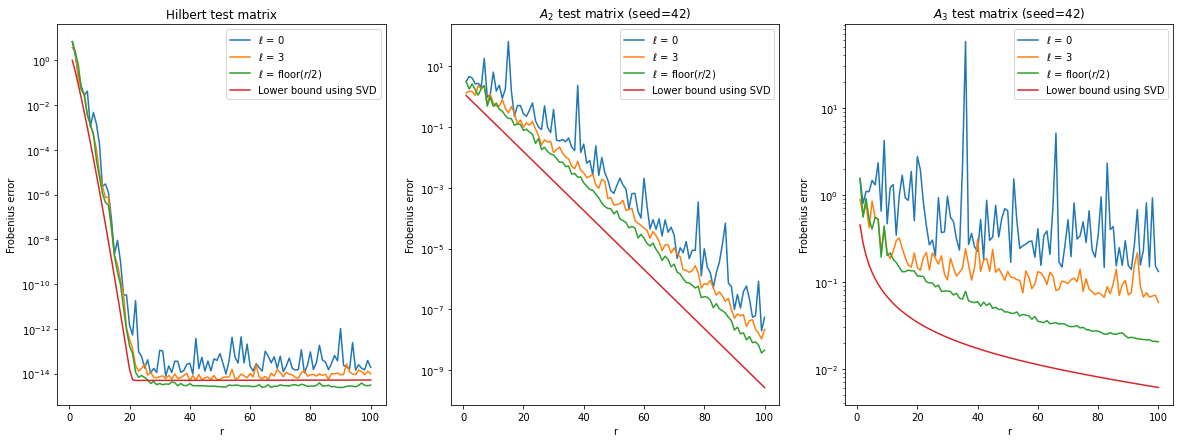

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

#Draw the Hilbert plot. 
ax[0].plot(range(1, 101), err_hilbert_l0, label='$\ell$ = 0')
ax[0].plot(range(1, 101), err_hilbert_l3, label='$\ell$ = 3')
ax[0].plot(range(1, 101), err_hilbert_floor, label='$\ell$ = floor($r$/2)')
ax[0].plot(range(1, 101), err_hilbert_lowerbound, label='Lower bound using SVD')
ax[0].set_yscale('log')
ax[0].set_xlabel('r')
ax[0].set_ylabel('Frobenius error')

#Draw the legend.
ax[0].legend()

#Set the title.
ax[0].set_title('Hilbert test matrix')

#Draw the A2 plot.
ax[1].plot(range(1, 101), err_A2_l0, label='$\ell$ = 0')
ax[1].plot(range(1, 101), err_A2_l3, label='$\ell$ = 3')
ax[1].plot(range(1, 101), err_A2_floor, label='$\ell$ = floor($r$/2)')
ax[1].plot(range(1, 101), err_A2_lowerbound, label='Lower bound using SVD')
ax[1].set_yscale('log')
ax[1].set_xlabel('r')
ax[1].set_ylabel('Frobenius error')

#Draw the legend.
ax[1].legend()

#Set the title.
ax[1].set_title('$A_2$ test matrix (seed=42)')

#Draw the A3 plot.
ax[2].plot(range(1, 101), err_A3_l0, label='$\ell$ = 0')
ax[2].plot(range(1, 101), err_A3_l3, label='$\ell$ = 3')
ax[2].plot(range(1, 101), err_A3_floor, label='$\ell$ = floor($r$/2)')
ax[2].plot(range(1, 101), err_A3_lowerbound, label='Lower bound using SVD')
ax[2].set_yscale('log')
ax[2].set_xlabel('r')
ax[2].set_ylabel('Frobenius error')

#Draw the legend.
ax[2].legend()

#Set the title.
ax[2].set_title('$A_3$ test matrix (seed=42)')

plt.show()

# Experiment 5

In this experiment, we want to look into the randomness of the algorithm. Below, we define our experiment setup where we return the following:

- `rs` : The rank for which the algorithm is run.
- `mean` : The mean over the `n` runs.
- `q1` : The lower quantile.
- `q2` : The median.
- `q3` : The upper quantile.
- `lb` : The error calculated using the truncated SVD for rank `r`.

In [7]:
#Create the A3 matrix.
A = generate_A3(200, seed=42)

def experiment_5(ell, seed=42, rs=np.array(range(1, 101)), n=1000):
    #Make list to store mean and quantiles.
    mean = []
    q1 = []
    q2 = []
    q3 = []

    for r in tqdm.tqdm(rs):
        err_A3_seed = [np.linalg.norm(A - GN(A, r=r, ell=ell, seed=seed), ord='fro') for seed in range(0, n)]
        #Calculate the mean and 95th quantiles.
        mean_r = np.mean(err_A3_seed)
        lwr, median, upper = np.quantile(err_A3_seed, [0.025, 0.5, 0.975])

        #Append to the list.
        mean.append(mean_r)
        q1.append(lwr)
        q2.append(median)
        q3.append(upper)

    #Calculate the lower bound using svd.
    U, S, V = np.linalg.svd(A)
    trA = lambda r : U[:, :r] @ np.diag(S[:r]) @ V[:r, :]
    lb = [np.linalg.norm(A - trA(r), ord='fro') for r in rs]
    
    return rs, mean, q1, q2, q3, lb

Let's run it - this might take a few minutes.

In [8]:
#Calculate the error for varying seed of the SGN algorithm.
n = 1000

rs, mean, q1, q2, q3, lb = experiment_5(ell=0, n=n)
experiment_ell_0 = {'rs' : rs, 'mean' : mean, 'q1' : q1, 'q2' : q2, 'q3' : q3, 'lb' : lb}

rs, mean, q1, q2, q3, lb = experiment_5(ell=3, n=n)
experiment_ell_3 = {'rs' : rs, 'mean' : mean, 'q1' : q1, 'q2' : q2, 'q3' : q3, 'lb' : lb}

rs, mean, q1, q2, q3, lb = experiment_5(ell = lambda r : int(np.floor(0.5*r)), n=n)
experiment_ell_floor = {'rs' : rs, 'mean' : mean, 'q1' : q1, 'q2' : q2, 'q3' : q3, 'lb' : lb}

100%|██████████| 100/100 [03:09<00:00,  1.90s/it]


and let's plot it!

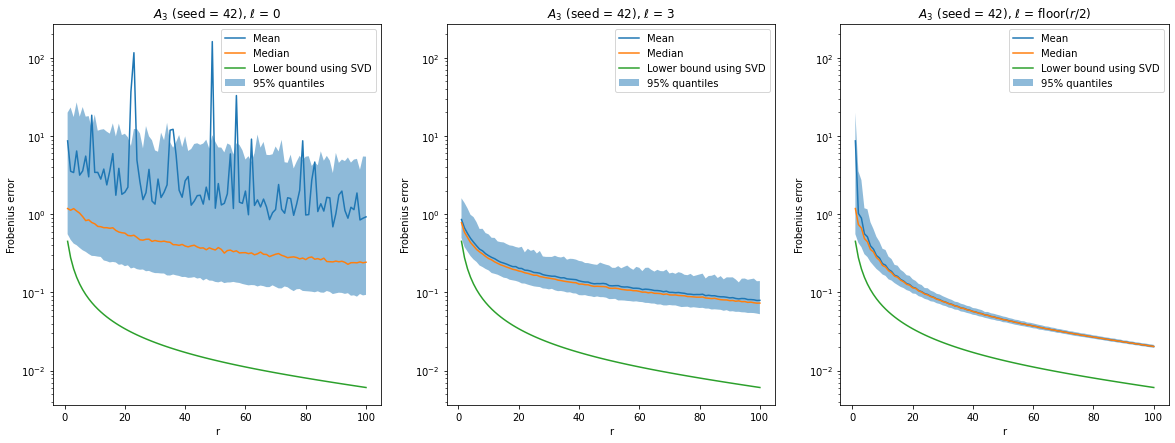

In [9]:
#Make a subplot with 3 columns and 1 row.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

#Draw the ell=0 plot.
ax[0].plot(experiment_ell_0['rs'], experiment_ell_0['mean'], label='Mean')
ax[0].plot(experiment_ell_0['rs'], experiment_ell_0['q2'], label='Median')
ax[0].fill_between(experiment_ell_0['rs'], experiment_ell_0['q1'], experiment_ell_0['q3'], alpha=0.5, label='95% quantiles')
ax[0].plot(experiment_ell_0['rs'], experiment_ell_0['lb'], label='Lower bound using SVD')
ax[0].set_yscale('log')
ax[0].set_xlabel('r')
ax[0].set_ylabel('Frobenius error')
ax[0].legend()

#Set the title.
ax[0].set_title('$A_3$ (seed = 42), $\ell$ = 0')

#Draw the ell=3 plot.
ax[1].plot(experiment_ell_3['rs'], experiment_ell_3['mean'], label='Mean')
ax[1].plot(experiment_ell_3['rs'], experiment_ell_3['q2'], label='Median')
ax[1].fill_between(experiment_ell_3['rs'], experiment_ell_3['q1'], experiment_ell_3['q3'], alpha=0.5, label='95% quantiles')
ax[1].plot(experiment_ell_3['rs'], experiment_ell_3['lb'], label='Lower bound using SVD')
ax[1].set_yscale('log')
ax[1].set_xlabel('r')
ax[1].set_ylabel('Frobenius error')
ax[1].legend()

#Set the title.
ax[1].set_title('$A_3$ (seed = 42), $\ell$ = 3')

#Draw the ell=floor(r/2) plot.
ax[2].plot(experiment_ell_floor['rs'], experiment_ell_floor['mean'], label='Mean')
ax[2].plot(experiment_ell_floor['rs'], experiment_ell_floor['q2'], label='Median')
ax[2].fill_between(experiment_ell_floor['rs'], experiment_ell_floor['q1'], experiment_ell_floor['q3'], alpha=0.5, label='95% quantiles')
ax[2].plot(experiment_ell_floor['rs'], experiment_ell_floor['lb'], label='Lower bound using SVD')
ax[2].set_yscale('log')
ax[2].set_xlabel('r')
ax[2].set_ylabel('Frobenius error')
ax[2].legend()

#Set the title.
ax[2].set_title('$A_3$ (seed = 42), $\ell$ = floor($r$/2)')

#Get the largest and smallest y value on all axis.
ymin = min([ax[0].get_ylim()[0], ax[1].get_ylim()[0], ax[2].get_ylim()[0]])
ymax = max([ax[0].get_ylim()[1], ax[1].get_ylim()[1], ax[2].get_ylim()[1]])

#Set the y limits to be the same for all axis.
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)
ax[2].set_ylim(ymin, ymax)

plt.show()
